# Visualizing Entropy with Rectangle Plots

**Remember:** Entropy measures uncertainty. But how do we *see* uncertainty?

Rectangle plots help us visualize:
- **How pure** each subset is (height = entropy)
- **How common** each value is (width = proportion of data)
- **Which splits** reduce uncertainty the most

Think of it like this: **You want short, wide rectangles** - lots of data that's very certain!

---

In this notebook, you'll:
1. Learn to read entropy rectangle plots
2. Compare good vs. bad features visually
3. Understand why some features split better than others

In [1]:
import cuanalytics as ca
# Load the mushroom dataset
df = cuanalytics.load_mushroom_data()

## How to Read Rectangle Plots

Each rectangle represents one value of a feature:

**📏 Width** = How much data has this value
- Wide rectangles = common values (lots of mushrooms)
- Narrow rectangles = rare values (few mushrooms)

**📈 Height** = Entropy (uncertainty) of this subset
- **Short rectangles (low)** = Pure! Mostly one class (good!)
- **Tall rectangles (high)** = Mixed! Both classes present (bad!)

**🎯 Goal:** Look for short, wide rectangles - that's where certainty lives!

## Example 1: A Great Feature - 'odor'

Remember from the Information Gain notebook that 'odor' was our champion feature (90.7% uncertainty reduction).

**Prediction:** What do you expect to see?
- Lots of tall rectangles (mixed classes)?
- OR lots of short rectangles (pure classes)?

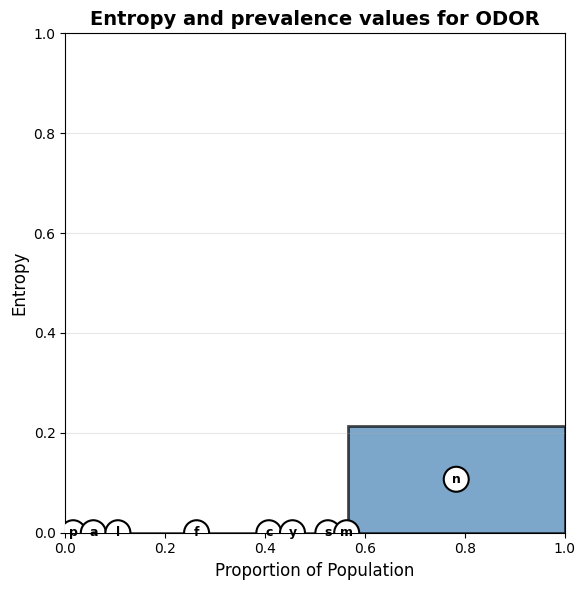

In [2]:
cuanalytics.plot_entropy(df, 'odor', target_col='class')

**Look at that!** 🎯

Notice:
- **Most rectangles are SHORT** - very low entropy!
- The **widest rectangles** (most common odors) are also the **shortest**
- This is what a great feature looks like!

**Translation:** When you split by odor, you get very pure groups. That's why information gain was so high!

## Example 2: A Bad Feature - 'cap-shape'

Now let's look at 'cap-shape', which had very low information gain (only 0.7%).

**Prediction:** What will this look like?

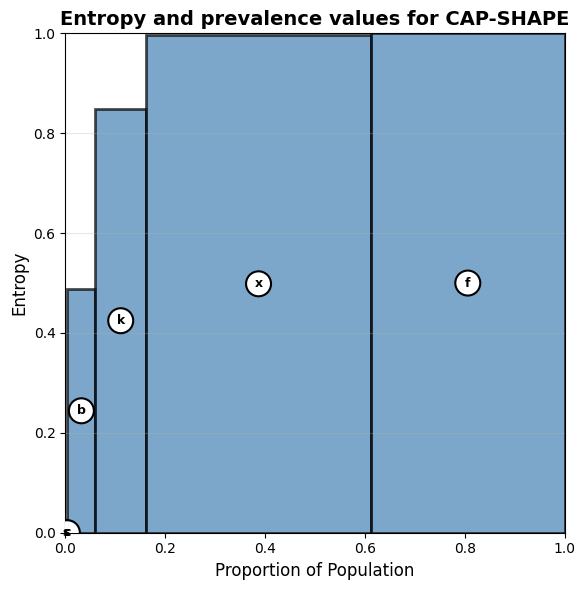

In [3]:
cuanalytics.plot_entropy(df, 'cap-shape', target_col='class')

**Oof!** 😬

See the difference?
- **Most rectangles are TALL** - high entropy!
- Even the common values (wide rectangles) are mixed
- This tells us cap-shape doesn't help much for classification

**Translation:** No matter what cap-shape a mushroom has, you still don't know if it's poisonous or edible!

## Example 3: A Middle Ground - 'gill-spacing'

Let's look at a feature that's somewhere in between (information gain = 39.8%).

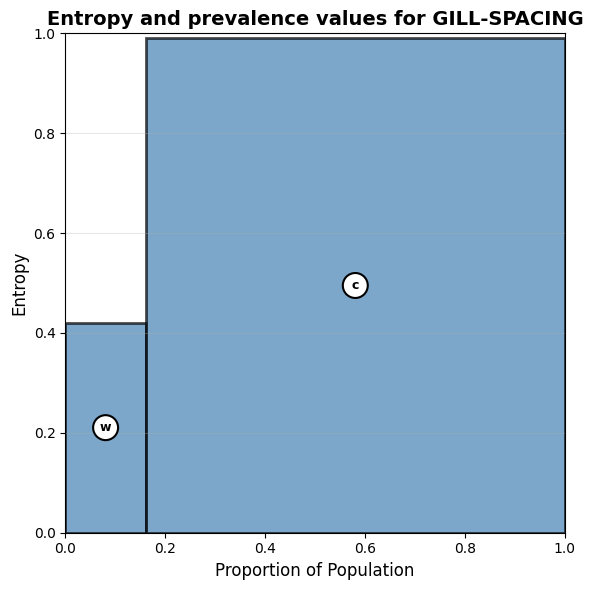

In [4]:
cuanalytics.plot_entropy(df, 'gill-spacing', target_col='class')

**Mixed results!** 🤔

This is what "moderate information gain" looks like:
- **Some rectangles are short** (good!)
- **Some rectangles are tall** (not helpful)
- Better than cap-shape, worse than odor

It helps some, but it's not a slam dunk like odor!

## 🎯 Your Turn: Visual Detective Work

Pick a feature and visualize it. Try to predict BEFORE running the code:
- Will it have mostly short rectangles (good) or tall ones (bad)?
- Will it be better or worse than gill-spacing?

**Available features:** cap-color, bruises, gill-size, gill-color, stalk-shape, ring-number, spore-print-color, population, habitat

*Hint: Try 'bruises' or 'spore-print-color'*

In [5]:
# Your code here!
# Example:
# cuanalytics.plot_entropy(df, 'bruises', target_col='class')

## Pattern Recognition: Good vs. Bad Features

After looking at several plots, you should notice:

**✅ GOOD features have:**
- Lots of short rectangles (low entropy)
- The widest rectangles are also short
- Clear separation between values

**❌ BAD features have:**
- Mostly tall rectangles (high entropy)
- Even common values are mixed
- All rectangles look similar in height

**💡 Key Insight:**

Information Gain is literally the *weighted average reduction* in rectangle height!
- Start with one tall rectangle (the whole dataset)
- Split into multiple smaller rectangles
- Information gain = how much shorter they get on average

## Compare Side-by-Side

Let's look at our three examples together to see the pattern clearly:

Compare these three plots:

1. odor (information gain: 0.9061)


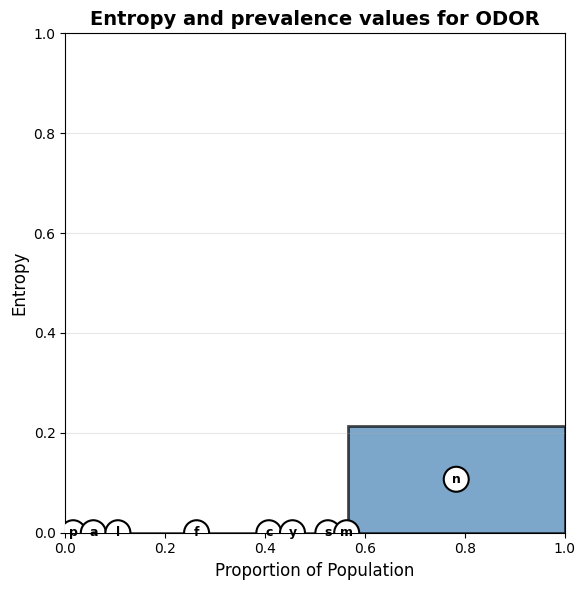


2. gill-spacing (information gain: 0.3973)


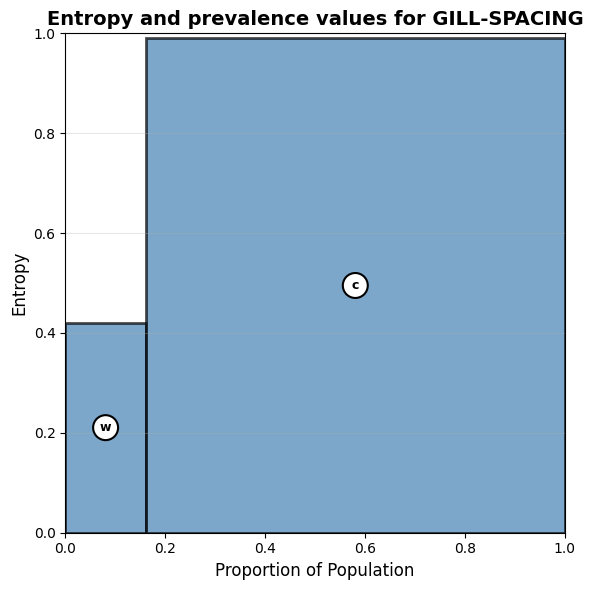


3. cap-shape (information gain: 0.0070)


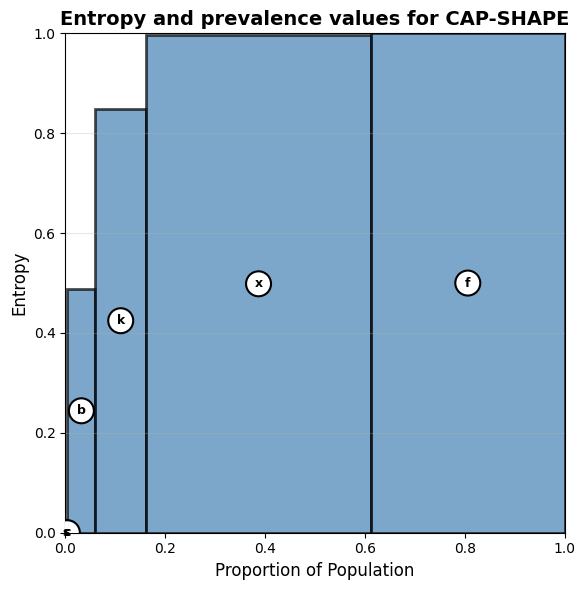


Notice how the rectangle heights correspond to information gain!


In [6]:
print("Compare these three plots:\n")
print("1. odor (information gain: 0.9061)")
cuanalytics.plot_entropy(df, 'odor', target_col='class')

print("\n2. gill-spacing (information gain: 0.3973)")
cuanalytics.plot_entropy(df, 'gill-spacing', target_col='class')

print("\n3. cap-shape (information gain: 0.0070)")
cuanalytics.plot_entropy(df, 'cap-shape', target_col='class')

print("\nNotice how the rectangle heights correspond to information gain!")

## Key Takeaways

**1. Rectangle plots make entropy visual**
   - Height = uncertainty
   - Width = how common
   - You want short and wide!

**2. Great features create pure subsets**
   - Lots of short rectangles
   - The most common values are also the purest
   - Example: odor

**3. Bad features don't separate classes**
   - Tall rectangles everywhere
   - No clear patterns
   - Example: cap-shape

**4. Information gain = average height reduction**
   - Start with one tall rectangle (whole dataset)
   - Split into smaller rectangles
   - How much shorter are they on average?
